## 1. Normal distribution ##
You believe that your data follows a normal distribution. Assuming the standard deviation ($\sigma$) is 0.5, you wish to estimate the mean $\mu$ of the normal distribution representing your data.
You thus have a model with a single parameter $\mu$ you wish to tune/train.
Discuss with your lab partner how the likelihood $p(D|\mu)$ for some observations $D = \{d_1, \cdots, d_N\}$ can be represented by (assuming independent observations):
\begin{align}
p(D|\theta) &= \prod_i \mathcal{N}(d_i|\theta, 0.25)\\
&= \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
\end{align}

In [6]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] =  (32.0, 24.0)
pylab.rcParams['font.size'] = 24


\begin{align}
p(D|\theta) &= \prod_i \mathcal{N}(d_i|\theta, 0.25)\\
&= \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
\end{align}

## 2. MLE ##
Use the Maximum Likelihood Estimate (MLE) recipe to find $\mu_{ML}$.  
*Note:* This is done on paper (or preferably in $\LaTeX$ in the cell below), not using `Python`.

### MLE Derivation ###

Put your latex derivation here


\begin{align}
p(D|\theta) &= \prod_i \mathcal{N}(d_i|\theta, 0.25)\\
&= \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}\\
 \ln p(D\theta) &= N\ln \frac{2}{\sqrt{2 \pi}}+ \sum_{i=1}^N-2(d_i-\mu)^2\\
\frac{d}{d\mu}p(D|\theta) &= \sum_{i=1}^N-4(-1)(d_i-\mu_{ML})\\
0 &= \sum_{i=1}^N(d_i=\mu_{ML})\\
0 &= \sum_{i=1}^N(d_i-\mu_{ML})\\
\mu_{ML} &= \frac{1}{N}\sum_{i=1}^Nd_i \\\\
\mu_{ML} &= \bar{d}
\end{align}

## 3. MLE - Experimentally ##
In this lab, we aim to help you understand MLE by experimenting with different values of $\mu$ to find $\mu_{ML} = arg\,max_\mu \, p(D|\mu)$.

**a) **Load the data from file `data1.dat` and plot a histogram of the data.

[ 0.49243   0.62491   0.85002   1.2884    0.7762    0.57076   0.27376
  0.99141  -0.34415   0.11251   1.0682    0.92343   0.06158   0.96851
  0.93473   0.10785   0.66411   1.501     0.45324   0.026227  0.77938
  0.41992   0.52065   0.90508   0.67258   0.50928   0.18414   0.28987
  0.18824   0.39742   1.5803    0.77383   0.42532   0.63607   0.82266
  0.83804   0.85936   1.2453    0.52806   0.87756   0.39069  -0.22948
  0.41403   1.409     0.5227    1.2109    1.0009    0.40137   1.6567
  1.1367  ]
50


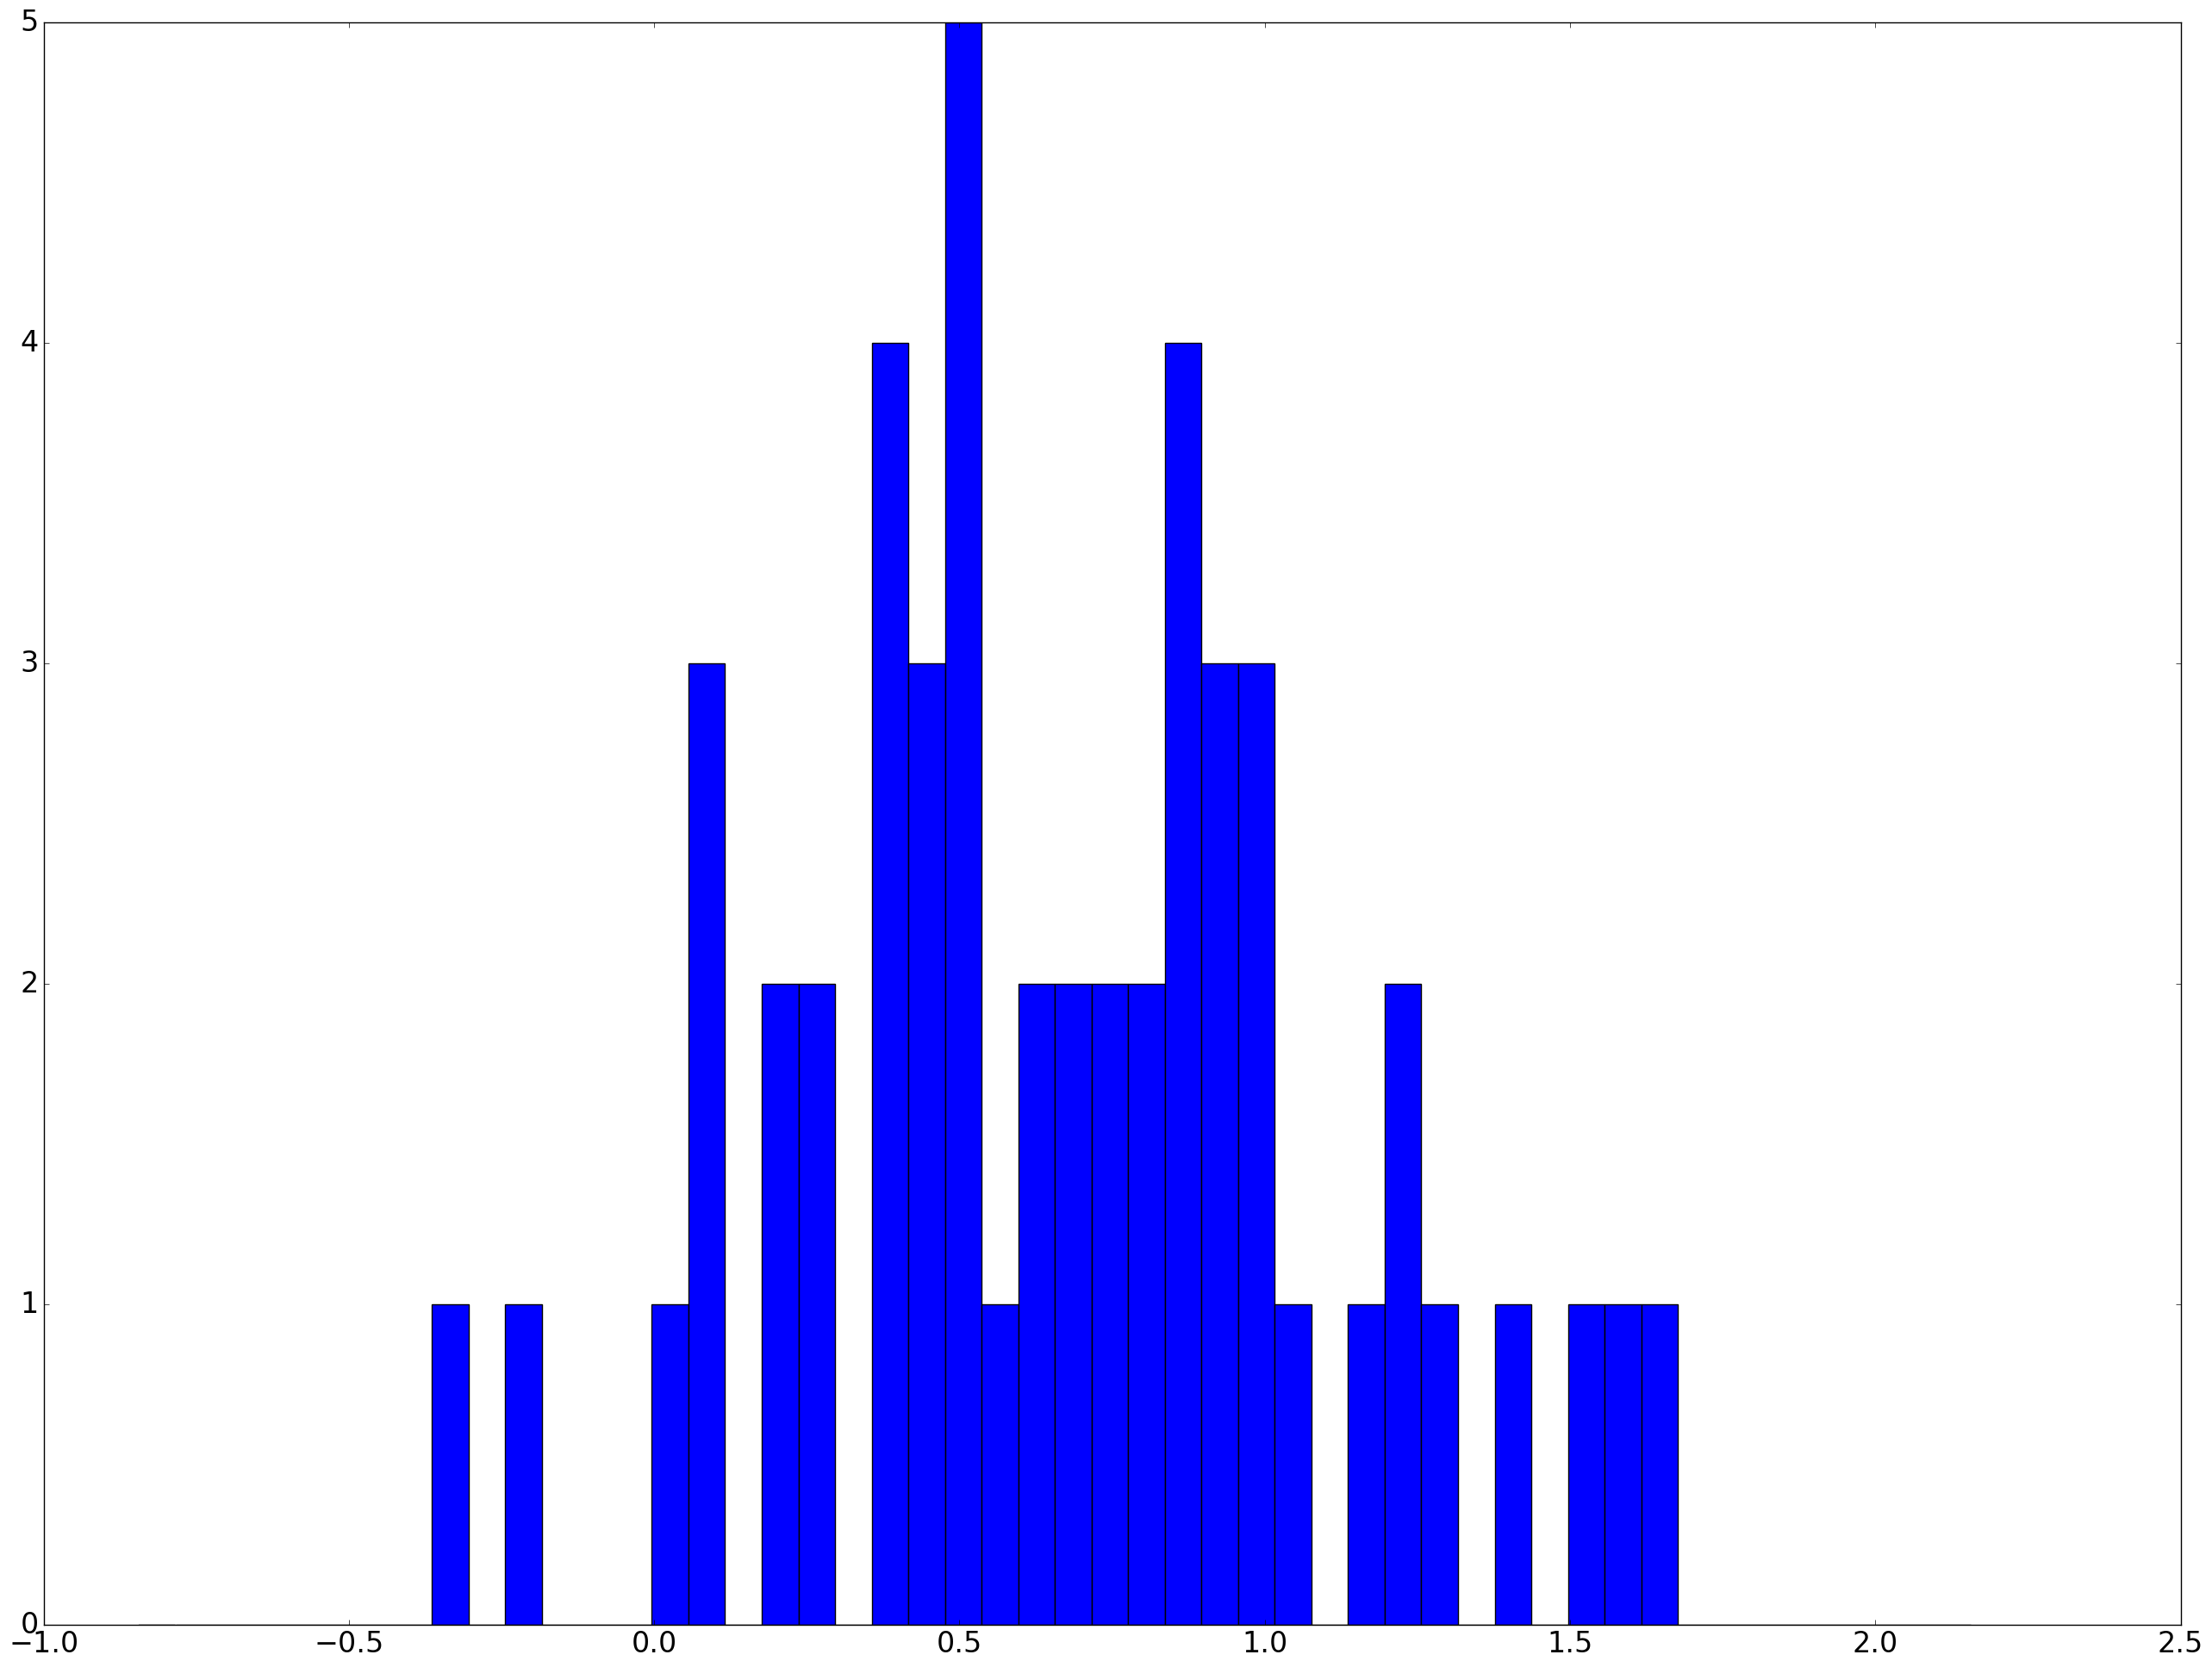

In [7]:

fig = plt.figure()
ax = fig.add_subplot( 111  )
data = np.loadtxt('data1.dat')
print(data)
print(data.size)
plt.hist(data, data.size, range=[np.amin(data)-0.5, np.amax(data)+0.5])
plt.show()

**b) ** Write a function `computeLikelihood(D, mu)` that takes a value of $\mu$ (e.g. $\mu$ = 0), and computes $p(D | \mu)$ using equation given in *Q1* for the data in `data1.dat`.  You may use the `Python` functions `stats.norm.pdf` and `np.prod` in the calculation. Do not use a loop

$$
p(D | \mu) = \prod_i \frac{2}{\sqrt{2 \pi}} e^{-2(d_i - \mu)^2}
$$

In [8]:
def computeLikelihood(D, mu):
    return np.prod(stats.norm.pdf(D, mu, 0.5))


**c) **Write a function `loopLikelihood(D)` that loops through possible values of  
$\mu \in \{0.00, 0.01, 0.02, ... , 1.00\}$, calls `computeLikelihood(D, mu)` for each value and stores an array of all likelihood values.

You may use a loop here

In [9]:
def loopLikelihood(D):
    muList = np.array([computeLikelihood(D, 0.0)])
    for i in np.arange(0.001, 1.00, 0.001):
        muList = np.concatenate((muList, [computeLikelihood(D, i)]))
    return muList


**d) **Based on your calculation, what would $\max p(D|\mu)$ be? What would $arg\,max_\mu \, p(D|\mu)$ be? Make sure you understand the difference between the two.

In [10]:
muList = loopLikelihood(data)
print('max p(D|mu) ', np.amax(muList))
muML = np.mean(data)
print('arg max mu P(D|mu) ', muML)


max p(D|mu)  4.49922599118e-14
arg max mu P(D|mu)  0.67423394


**e) **Plot $\mu$ against $p(D|\mu)$ for different $\mu$ values. Can you visually spot $\mu_{ML}$.

In [11]:
plt.plot(np.arange(0.0, 1.0, 0.001), muList)

**f) **How does this compare to $\mu_{ML}$ you concluded in *Q2* of this sheet.

**g) **Assume you have prior knowledge of what $\mu_{ML}$ should be, $p(\mu) = \mathcal{N}(0.5,0.01)$. Write functions `computePosterior(D, mu)` and `loopPosterior(D)` to find  
$\mu_{MAP} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

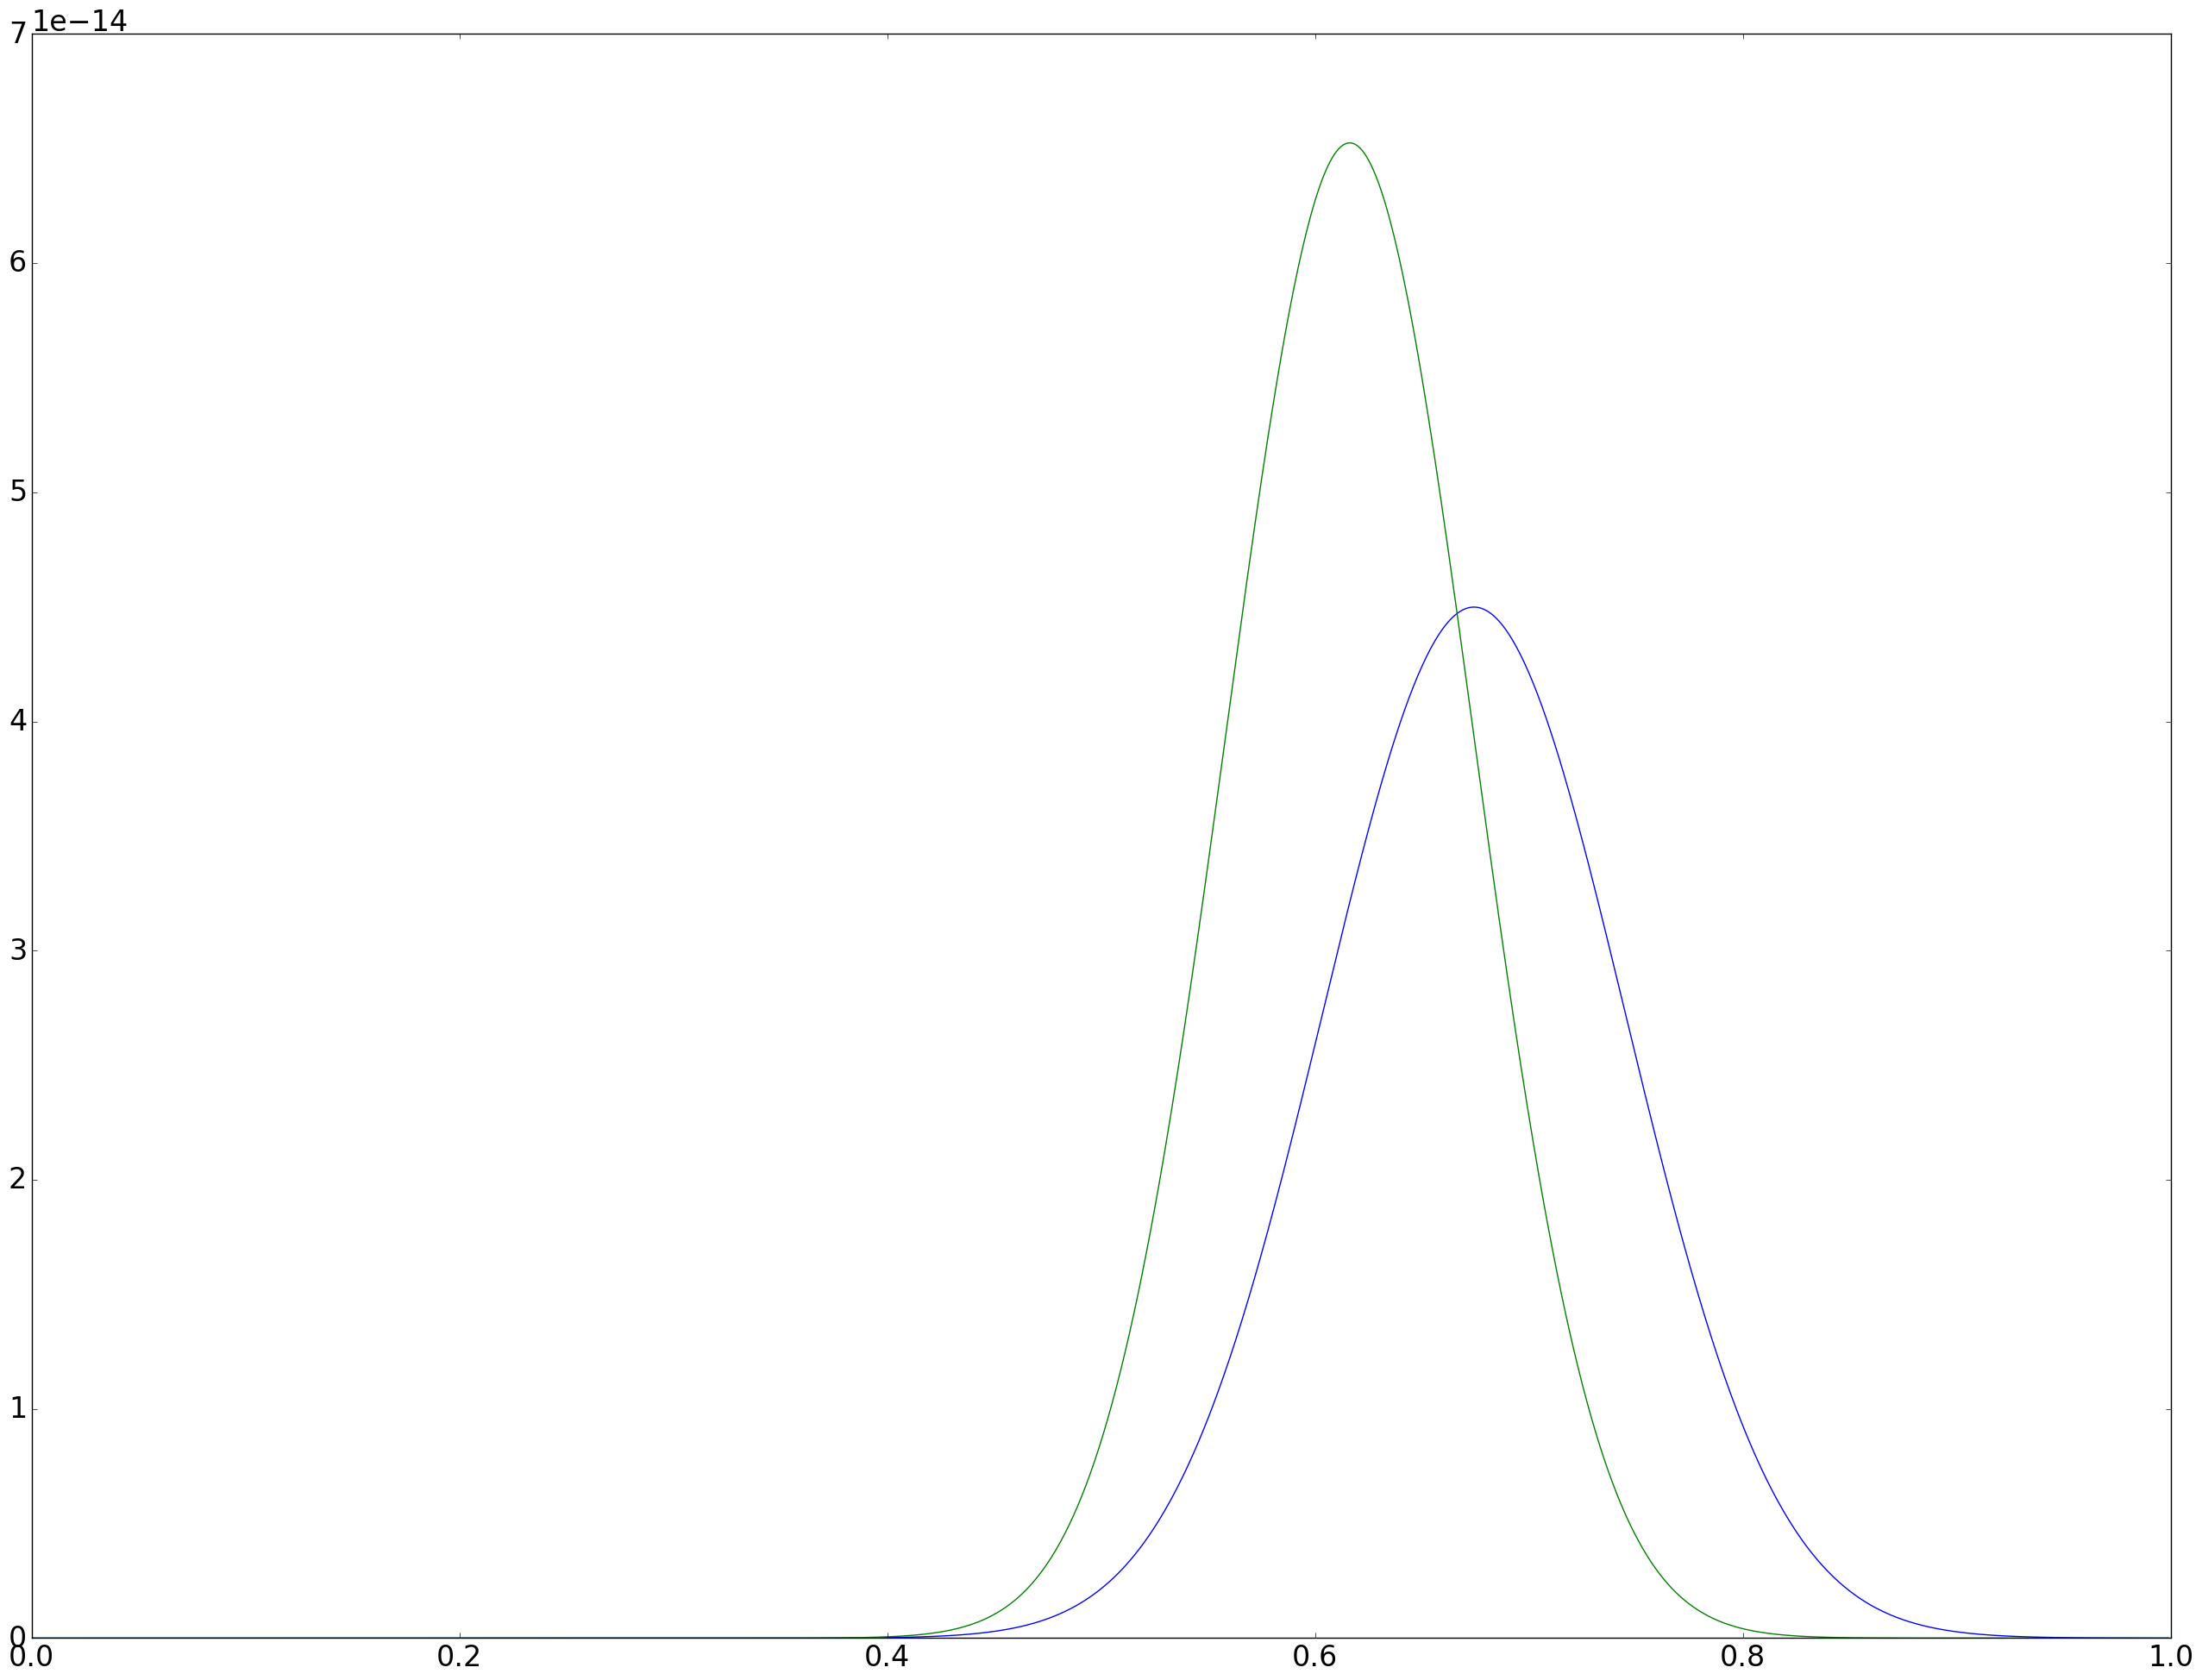

In [12]:
def computeProstieror(D, mu):
    prior = stats.norm(0.5, 0.01**0.5).pdf(mu)
    return computeLikelihood(D, mu)*prior

def loopPosterior(D):
    posList = np.array([computeProstieror(D, 0.0)])
    for i in np.arange(0.001, 1.00, 0.001):
        posList = np.concatenate((posList, [computeProstieror(D, i)]))	
    return posList

muMAP = loopPosterior(data)
pl = plt.plot(np.arange(0.0, 1.0, 0.001), muMAP)
plt.show()

**h) **plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

**i) **Repeat the above calculations for `data2.dat` and `data3.dat` and explain your observations.

**EXTRA 1: **Until now, you assumed $\sigma$ = 0.5. Remove this assumption and estimate $\theta_{MAP} = [\mu_{MAP}, \sigma_{MAP}]$ experimentally by looping through possible values of $\mu$ and $\sigma$. Assume the prior probability for $p(\sigma)$ is $\mathcal{N}(0.5, 0.16)$.

---
Tip: You may need to use `np.nanargmax` instead of `np.argmax`.

**EXTRA 2: **Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface` in `Python`).
![MLE mesh](mle2.png)